# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
> 1. Visualizing film production over the years.
> 2. Distribution of Average user ratings.
> 3. Which movie makes the highest profit, and which one makes the worst loss.
> 4. The most actor, director, and genre.
> 5. Relation between budget and revenue.
> 6. Top movies by budget, revenue.
> 7. Top movies by vote counts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
#load data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#shape of data
df.shape

(10866, 21)

###### The statistical description of the data

In [4]:
#data description
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#looking at the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

#### Drop unneeded columns
Delete the columns that have no help with the analysis process.

In [6]:
#drop the unneeded columns
df.drop(['id','imdb_id','popularity','homepage','tagline','overview','release_date','keywords','production_companies','budget_adj','revenue_adj'], axis = 1,inplace=True)
#data after drops
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 849.0+ KB


#### Delete duplicated rows

In [8]:
#found duplicated
df.duplicated().sum()

1

In [9]:
#remove duplicated
df.drop_duplicates(inplace=True)

In [10]:
#check for duplicates
df.duplicated().sum()

0

#### Delete rows that conations specific null values

In [11]:
#looking for null
df.isnull().sum()

budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [12]:
#display rows that contain null values
df[df.isnull().any(axis=1)]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
371,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,47,6.9,2015
424,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,21,6.1,2015
441,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,37,8.2,2015
465,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,19,7.8,2015
532,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,14,6.6,2015
536,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,12,8.0,2015
538,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015
548,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,12,7.5,2015
556,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,14,6.5,2015
587,0,0,The Hunting Ground,NaN,Kirby Dick,103,Documentary,39,7.8,2015


There are 134 movies with no cast or no director or no genre, we will delete them.

In [13]:
#delete all rows with null values
df.dropna(inplace=True)

In [14]:
#checking for null values
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

### Removing rows with 0 (runtime, budget, revenue)

#### Removing rows with no runtime

In [15]:
#rows with no runtime
df[df.runtime == 0]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015
334,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,80,6.5,2015
410,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,15,5.6,2015
445,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,52,5.0,2015
486,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,11,5.4,2015
595,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,11,4.6,2015
616,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,20,6.6,2015
1289,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,16,3.4,2014
1293,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,14,6.0,2014
1849,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,13,5.2,2009


In [16]:
# remove rows with no runtime
df = df[df.runtime != 0]
df.shape

(10703, 10)

#### Remove rows with no revenue

In [17]:
#rows with no revenue
df[df.revenue == 0]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
48,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,481,5.3,2015
67,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,280,5.4,2015
74,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,27,5.1,2015
75,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,569,7.7,2015
93,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,181,4.1,2015
100,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,475,7.0,2015
101,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,161,5.4,2015
103,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Thriller|Action,114,5.6,2015
116,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,22,4.5,2015
122,0,0,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,Joe Lynch,90,Thriller|Action,169,5.1,2015


There is more than half of the dataset has 0 as revenue, keeping it in the analysis will lead to a false correlation between budget and revenue, so we will delete all these rows.

In [18]:
# remove rows with no revenue
df = df[df.revenue != 0]
df.shape

(4843, 10)

#### Removing rows with no budget

In [19]:
#rows with no budget
df[df.budget == 0]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
30,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,425,6.4,2015
36,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,474,6.2,2015
72,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,81,5.5,2015
88,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,135,5.6,2015
95,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure|Animation|Comedy|Family,278,5.7,2015
119,0,5189646,Absolutely Anything,Simon Pegg|Kate Beckinsale|Rob Riggle|Sanjeev ...,Terry Jones,85,Comedy|Science Fiction,199,5.8,2015
125,0,229094,Slow West,Michael Fassbender|Kodi Smit-McPhee|Ben Mendel...,John Maclean,84,Romance|Thriller|Western,229,6.6,2015
128,0,2500431,Mistress America,Greta Gerwig|Lola Kirke|Charlie Gillette|Dean ...,Noah Baumbach,84,Comedy,132,6.4,2015
130,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,100,Crime|Drama|Mystery,354,6.0,2015
132,0,59700000,Shaun the Sheep Movie,Justin Fletcher|Omid Djalili|Richard Webber|Ka...,Mark Burton|Richard Starzack,85,Family|Animation|Comedy|Adventure,340,6.9,2015


In [20]:
# remove rows with no budget
df = df[df.budget != 0]
df.shape

(3849, 10)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Visualizing film production over the years)

In [21]:
#creat new column for profit
df['profit'] = df['revenue']-df['budget']
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


#### Visualizing film production over the years. 

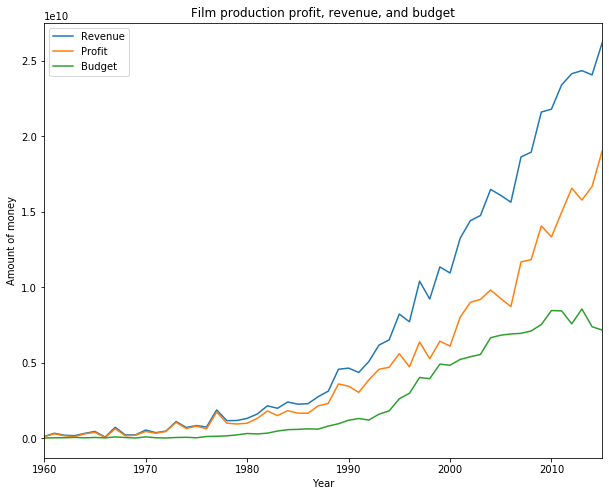

In [22]:
#film proudaction profits,revenues,bugets over years
df.groupby('release_year').revenue.sum().plot(kind= 'line',figsize=(10,8),label='Revenue')
df.groupby('release_year').profit.sum().plot(kind= 'line',figsize=(10,8),label='Profit')
df.groupby('release_year').budget.sum().plot(kind= 'line',figsize=(10,8),label='Budget')
plt.title("Film production profit, revenue, and budget")
plt.xlabel("Year")
plt.ylabel("Amount of money")
plt.legend();

#### The number of movies produced over years

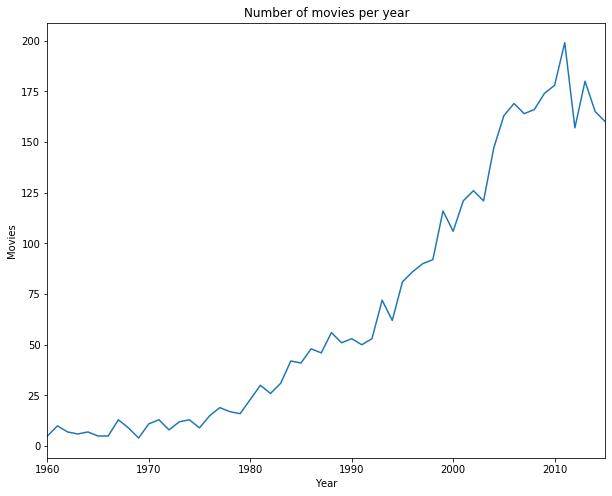

In [23]:
#line of the number of movies produced over years
df.release_year.value_counts().sort_index().plot(kind='line',figsize=(10,8))
plt.title("Number of movies per year")
plt.xlabel("Year")
plt.ylabel("Movies");

it's clear, there is a huge growth in film production over the years.

### Research Question 2  (Distribution of average user ratings)

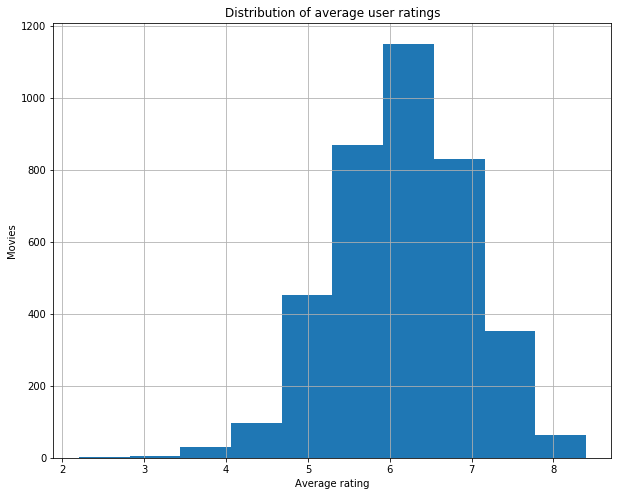

In [24]:
#distrubation of average user ratings
df.vote_average.hist(figsize=(10,8))
plt.title("Distribution of average user ratings")
plt.xlabel("Average rating")
plt.ylabel("Movies");

The most average user ratings is about 6.

### Research Question 3 (Which movie makes the highest profit, and which one makes the worst loss)

## The highest profit
#### The movie that makes the highest profit


In [25]:
#Movie who make most profit
best_profit = df.profit.max()
df[df['profit']==best_profit]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847


**Avatar (2009)** by *James Cameron* makes the highest profit by $ 2,544,505,847

## The worst loss
#### The movie that makes the worst loss

In [26]:
#movie with most lose money
big_lose = df.profit.min()

In [27]:
df[df['profit']==big_lose]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,-413912431


**The Warrior's Way (2010)** by *Sngmoo Lee* makes the worst loss by $ 413,912,431

### Research Question 4 (The most actor, director, and genre)

### The Most in cast, director, and genres columns

In [28]:
#create a function to split a cell into their individuals
def split_column(column):
    """Function split a cell with multitype data to their individuals' data"""
    #create dict
    dict_column = {}
    for items in column:
    #split item from a cell
        item = items.split(sep='|')
        for i in item:
            if i not in dict_column :
                dict_column[i] = 1
            else:
                dict_column[i] += 1
    return dict_column

### Top actors' appearances in movies

In [29]:
#spilt cast into varibale actors
actors = df['cast']
#create a new data frame for actors and their movies by calling the function
actor_df = pd.DataFrame(split_column(actors).items(), columns=['actor', 'movies'])
#sorting by value
actor_df = actor_df.sort_values('movies',ascending=False)
actor_df.head()

,actor,movies
220,Robert De Niro,52
571,Bruce Willis,46
73,Samuel L. Jackson,44
808,Nicolas Cage,43
34,Matt Damon,36


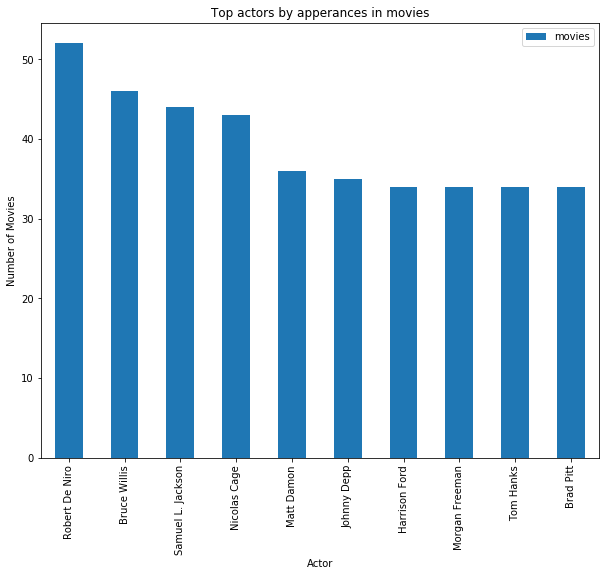

In [30]:
#bar graph showing the top 10 actors' appearances
actor_df.iloc[:10].plot(kind='bar' , x='actor',figsize=(10,8))
plt.title("Top actors by apperances in movies")
plt.xlabel("Actor")
plt.ylabel("Number of Movies");

**Robert De Niro** has the most appearances in movies with **52** movies.

### Top directories make movies

In [31]:
#split director into varibale director
director = df['director']
# create a new data frame for directors and their movies by calling the function
director_df = pd.DataFrame(split_column(director).items(), columns=['director', 'movies'])
#sorting by value
director_df = director_df.sort_values('movies',ascending=False)
director_df.head()

,director,movies
34,Steven Spielberg,28
193,Clint Eastwood,24
7,Ridley Scott,21
125,Woody Allen,18
401,Steven Soderbergh,17


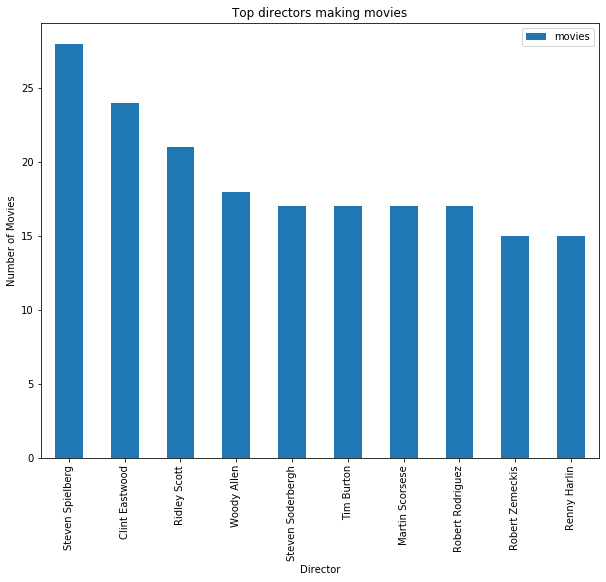

In [32]:
#bar graph showing the top 10 directors
director_df.iloc[:10].plot(kind='bar' , x='director',figsize=(10,8))
plt.title("Top directors making movies")
plt.xlabel("Director")
plt.ylabel("Number of Movies");

**Steven Spielberg** is the most director with **28** movie.

### The most genre of the movies

In [33]:
#split genres into varibale generes
genres = df['genres']
# create a new data frame for genres by calling the function
genre_df = pd.DataFrame(split_column(genres).items(), columns=['genre', 'movies'])
#sorting by value
genre_df = genre_df.sort_values('movies',ascending=False)
genre_df.head()

,genre,movies
7,Drama,1753
10,Comedy,1357
3,Thriller,1203
0,Action,1085
1,Adventure,749


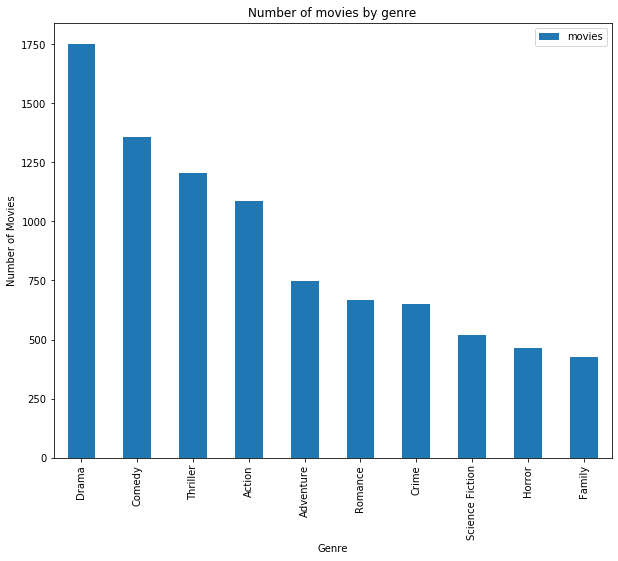

In [34]:
#bar graph showing the top 10 genres
genre_df.iloc[:10].plot(kind='bar', x="genre",figsize=(10,8))
plt.title("Number of movies by genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies");

**Drama** is the most genre.

### Research Question 5 (Relation between budget and revenue)

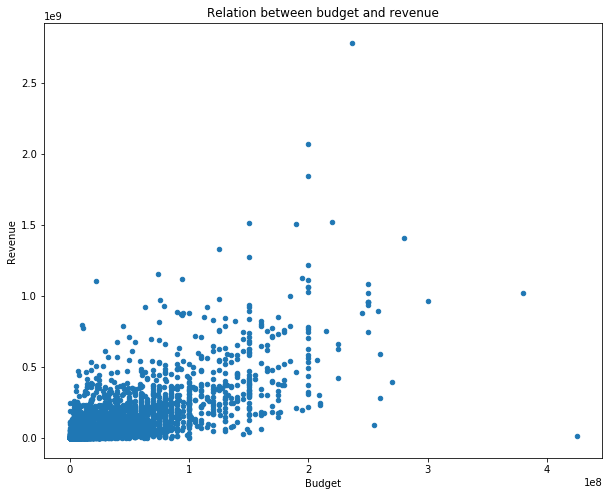

In [35]:
#relation between budget and revenue
df.plot( x='budget', y='revenue',kind='scatter',figsize=(10,8))
plt.title("Relation between budget and revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue");

Most movies have a low budget and low revenue, Also we can see a positive relationship between budget and revenue.

### Research Question 6 (Top Movies by budget, revenue)

#### Top movies by budget

In [36]:
#sorting df by budget
df_budget = df.sort_values('budget',ascending=False)
df_budget.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,-413912431
3375,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,3180,6.3,2011,641683000
7387,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,2626,6.8,2007,661000000
14,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4304,7.4,2015,1125035767
6570,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,834,5.3,2006,121081192


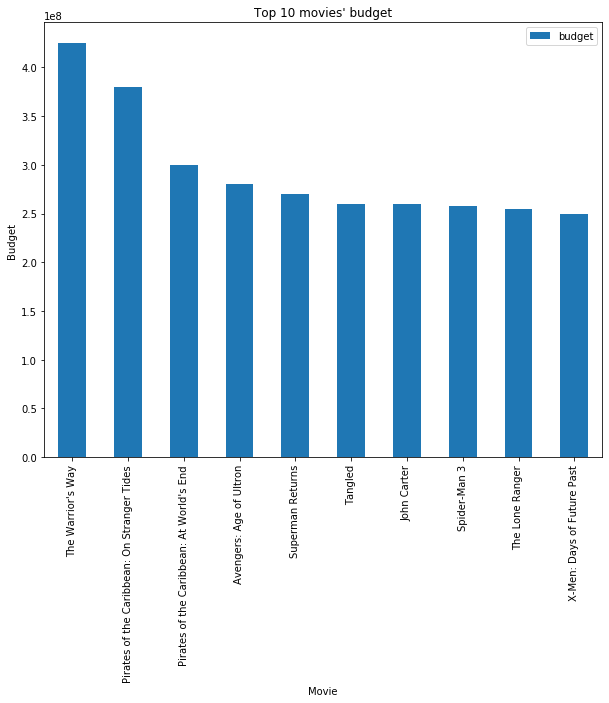

In [37]:
#top 10 movies by budget
df_budget.iloc[:10].plot(kind='bar',x='original_title', y='budget',figsize=(10,8))
plt.title("Top 10 movies' budget")
plt.xlabel("Movie")
plt.ylabel("Budget");

**The Warrior's Way (2010)** by *Sngmoo Lee* has the hightest budget by $425,000,000

#### Top movies by revenue

In [38]:
#sorting df by revenue adj
df_revenue = df.sort_values('revenue',ascending=False)
df_revenue.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
5231,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,4654,7.3,1997,1645034188
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,8903,7.3,2012,1299557910
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810


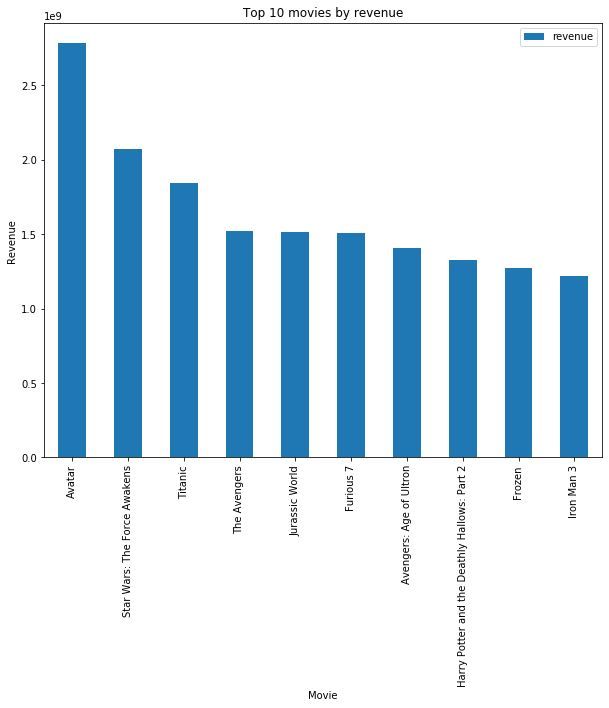

In [39]:
#top 10 movies by revenue
df_revenue.iloc[:10].plot(kind='bar',x='original_title', y='revenue',figsize=(10,8))
plt.title("Top 10 movies by revenue")
plt.xlabel("Movie")
plt.ylabel("Revenue");

**Avatar (2009)** by *James Cameron* has the hightest revenue by $2,781,505,847

### Research Question 7 (Top Movies by vote counts)

#### Top movies by vote count

In [40]:
#sorting df by vote_count
df_vote_count = df.sort_values('vote_count',ascending=False)
df_vote_count.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
1919,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,9767,7.9,2010,665500000
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,8903,7.3,2012,1299557910
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847
2875,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,8432,8.1,2008,816921825
4364,100000000,425368238,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,165,Drama|Western,7375,7.7,2012,325368238


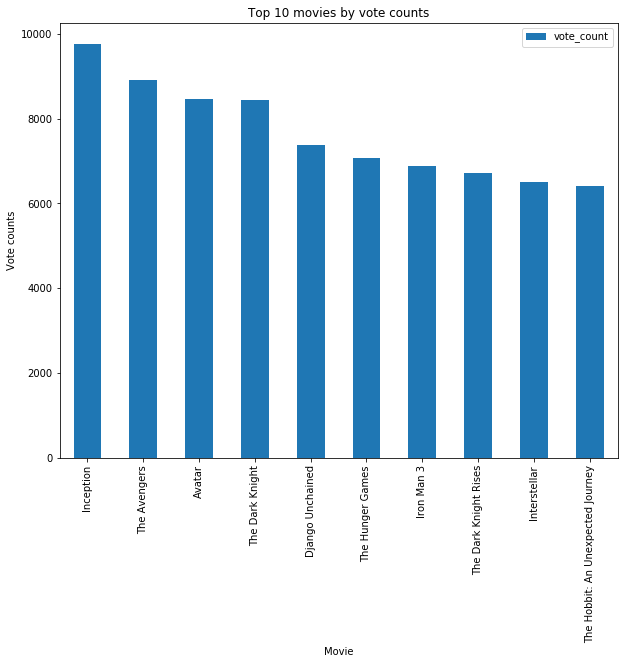

In [41]:
#top 10 movies by vote counts
df_vote_count.iloc[:10].plot(kind='bar',x='original_title', y='vote_count',figsize=(10,8))
plt.title("Top 10 movies by vote counts")
plt.xlabel("Movie")
plt.ylabel("Vote counts");

**Inception (2010)** by *Christopher Nolan* has the highest vote count by **9767** vote

<a id='conclusions'></a>
## Conclusions

> We have analyzed the dataset of tmdb-movie and see how the industry of film production growth over the years.
> And the distribution of user rating 
> And found the following conclusions,
> *Robert De Niro* is the most actor appearance in movies, *Steven Spielberg* is the most director, and Drama is the most genres of movies.
> *Avatar (2009)* makes the best profit, And *The Warrior's Way (2010)* makes the worst loss.
> *Avatar (2009)* has the top revenue, and *The Warrior's Way (2010)* has the most budget.
> *Inception (2010)* has the highest vote counts.

### Limitations
> It was hard to spilt cells cast, director, and genre into separate ones with the NaN values so deleting these NaN value.
> there were more than half of the dataset rows with no revenue or no budget, it was too hard to decesion to keep them or delete them, so deleting them because doing the analysis process with these rows will lead to a false correlation between budget and revenue.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0